<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW5/hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u

# apparently `%pylab inline` is depracated
%matplotlib inline


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [47]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [48]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


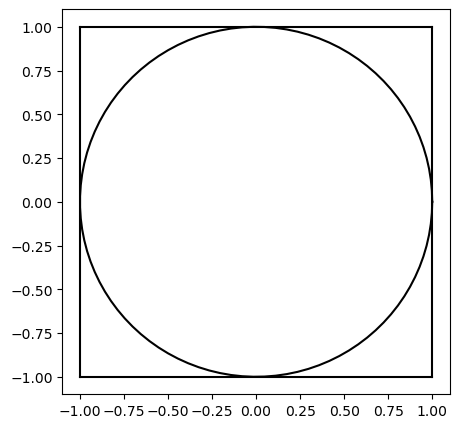

In [49]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [ ]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  return x**2 + y**2 < l**2
# < vs <= won't matter for the approximation as both will converge at the same rate

In [ ]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
np.random.seed(0)
n = 10**3
l = 1
sample = 2*l*np.random.random_sample(size=(n,2)) - l
# NOTE: this function only samples from [-l, l) by [-l, l), so it's technically missing the upper bounds
# However, similar to the isin function this will affect neither convergence or convergence speed.

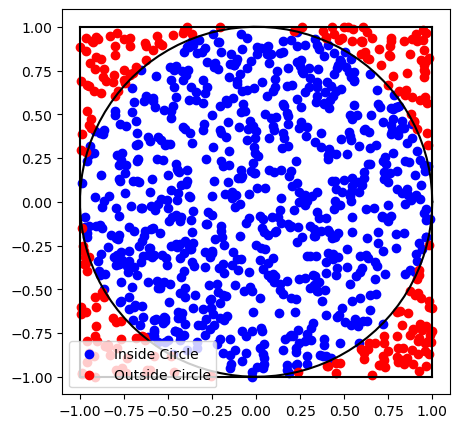

In [61]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)
isin_mask = isin(sample[:,0], sample[:,1], 1)


pl.scatter(sample[isin_mask,0], sample[isin_mask,1], color='b', label='Inside Circle')
pl.scatter(sample[~isin_mask,0], sample[~isin_mask,1], color='r', label='Outside Circle')
pl.legend()

In [53]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
isin_ratio = np.sum(isin(sample[:,0], sample[:,1], 1))/n
pi_approx = 4*isin_ratio

In [54]:
pi_approx

np.float64(3.1228)